In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


In [14]:

방어_data.info()
방어_data.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11205 entries, 0 to 11204
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   priceDate       11205 non-null  object 
 1   item            11205 non-null  object 
 2   market          11205 non-null  object 
 3   minPrice        11205 non-null  float64
 4   avgPrice        11205 non-null  float64
 5   maxPrice        11205 non-null  float64
 6   avgPrice_lag_1  11195 non-null  float64
 7   avgPrice_lag_2  11185 non-null  float64
 8   avgPrice_lag_3  11175 non-null  float64
 9   avgPrice_lag_7  11139 non-null  float64
dtypes: float64(7), object(3)
memory usage: 875.5+ KB


Index(['priceDate', 'item', 'market', 'minPrice', 'avgPrice', 'maxPrice',
       'avgPrice_lag_1', 'avgPrice_lag_2', 'avgPrice_lag_3', 'avgPrice_lag_7'],
      dtype='object')

In [15]:
방어_data = pd.read_csv('../../notebooks/시계열_의존성/방어_price_data.csv')
drop_list = ['minPrice', 'maxPrice',
       'avgPrice_lag_1', 'avgPrice_lag_2', 'avgPrice_lag_3', 'avgPrice_lag_7']
방어_data.drop(columns=drop_list, inplace=True)

In [16]:
방어_data

,priceDate,item,market,avgPrice
0,2020-10-25,방어,가락시장,35000.0
1,2020-10-26,방어,가락시장,35000.0
2,2020-10-27,방어,가락시장,35000.0
3,2020-10-28,방어,가락시장,35000.0
4,2020-10-29,방어,가락시장,35000.0
...,...,...,...,...
11200,2025-01-15,방어,인천종합연안부두어시장,35000.0
11201,2025-01-16,방어,인천종합연안부두어시장,35000.0
11202,2025-01-17,방어,인천종합연안부두어시장,35000.0
11203,2025-01-18,방어,인천종합연안부두어시장,35000.0


방어_data

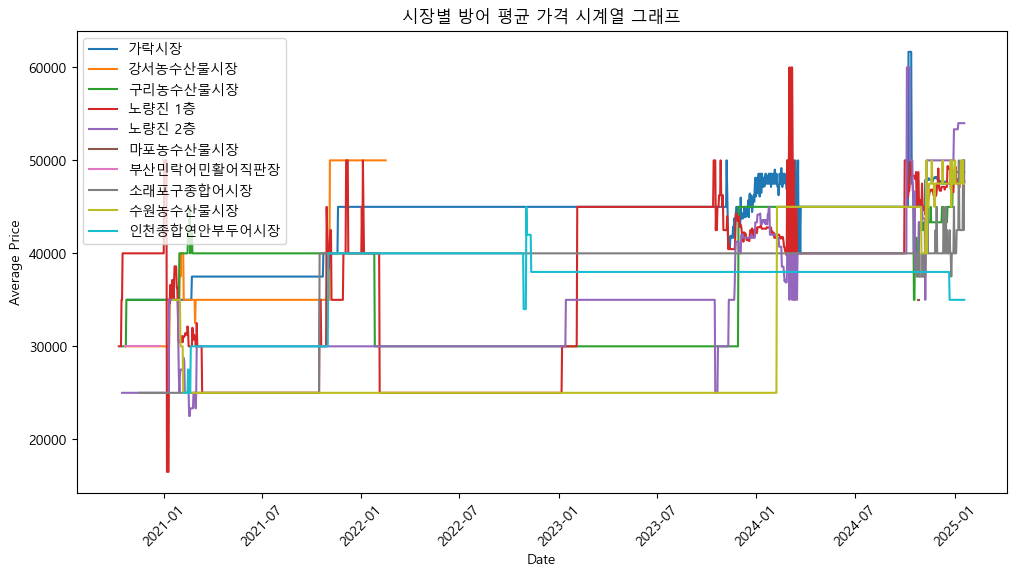

        Market  Standard Deviation  Mean Return         ATR
0         가락시장         4003.318421     0.000394  174.130575
1     강서농수산물시장         6872.061994     0.001297   83.333333
2     구리농수산물시장         6389.640582     0.000457   57.577121
3       노량진 1층         8878.222609     0.001493  323.399488
4       노량진 2층         6383.153093     0.000847  151.928021
5     마포농수산물시장            0.000000     0.000000    0.000000
6  부산민락어민활어직판장            0.000000     0.000000    0.000000
7    소래포구종합어시장         6255.403525     0.000651   95.081967
8     수원농수산물시장         8701.945707     0.000428   73.579740
9  인천종합연안부두어시장         3596.028911     0.000329   32.593620


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 파일 로드
file_path = '../../notebooks/시계열_의존성/방어_price_data.csv'
df = pd.read_csv(file_path)

# 날짜 형식 변환
df["priceDate"] = pd.to_datetime(df["priceDate"])

# 시장별 리스트 추출
markets = df["market"].unique()

# 1. 시장별 시계열 그래프 그리기
plt.figure(figsize=(12, 6))
for market in markets:
    market_df = df[df["market"] == market]
    plt.plot(market_df["priceDate"], market_df["avgPrice"], label=market)

plt.xlabel("Date")
plt.ylabel("Average Price")
plt.title("시장별 방어 평균 가격 시계열 그래프")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# 2. 시장별 표준편차, 변동률 평균, ATR 계산
market_stats = []

for market in markets:
    market_df = df[df["market"] == market].sort_values("priceDate").copy()
    
    # 가격 변화율 계산 (pct_change() 이용)
    market_df["return"] = market_df["avgPrice"].pct_change()
    
    # ATR 계산 (단순화 버전: 하루 변동폭 이용)
    market_df["atr"] = market_df["avgPrice"].diff().abs()
    
    # 통계 값 계산
    std_dev = market_df["avgPrice"].std()  # 표준편차
    mean_return = market_df["return"].mean()  # 변동률 평균
    avg_atr = market_df["atr"].mean()  # ATR 평균
    
    market_stats.append([market, std_dev, mean_return, avg_atr])

# 데이터프레임 변환
market_stats_df = pd.DataFrame(market_stats, columns=["Market", "Standard Deviation", "Mean Return", "ATR"])

# 데이터 출력
print(market_stats_df)
